In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [2]:
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [4]:
train.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

<AxesSubplot:xlabel='uniqueid', ylabel='age_of_respondent'>

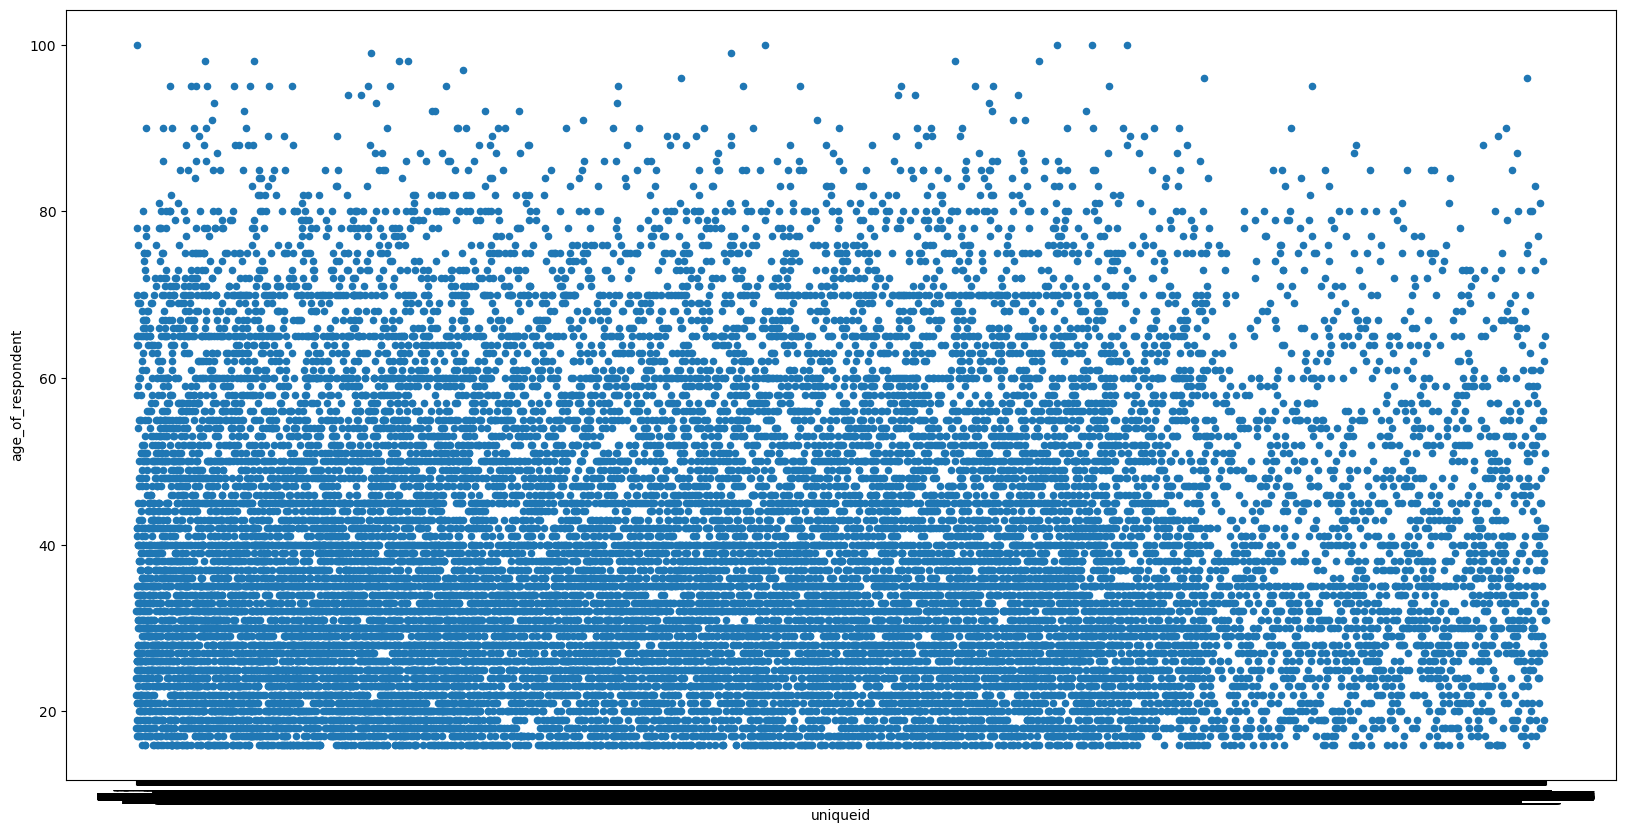

In [5]:
# Checking for outliers in the age column
train[['uniqueid', 'age_of_respondent']].plot(kind='scatter', x='uniqueid', y='age_of_respondent', figsize=(20,10))

<AxesSubplot:>

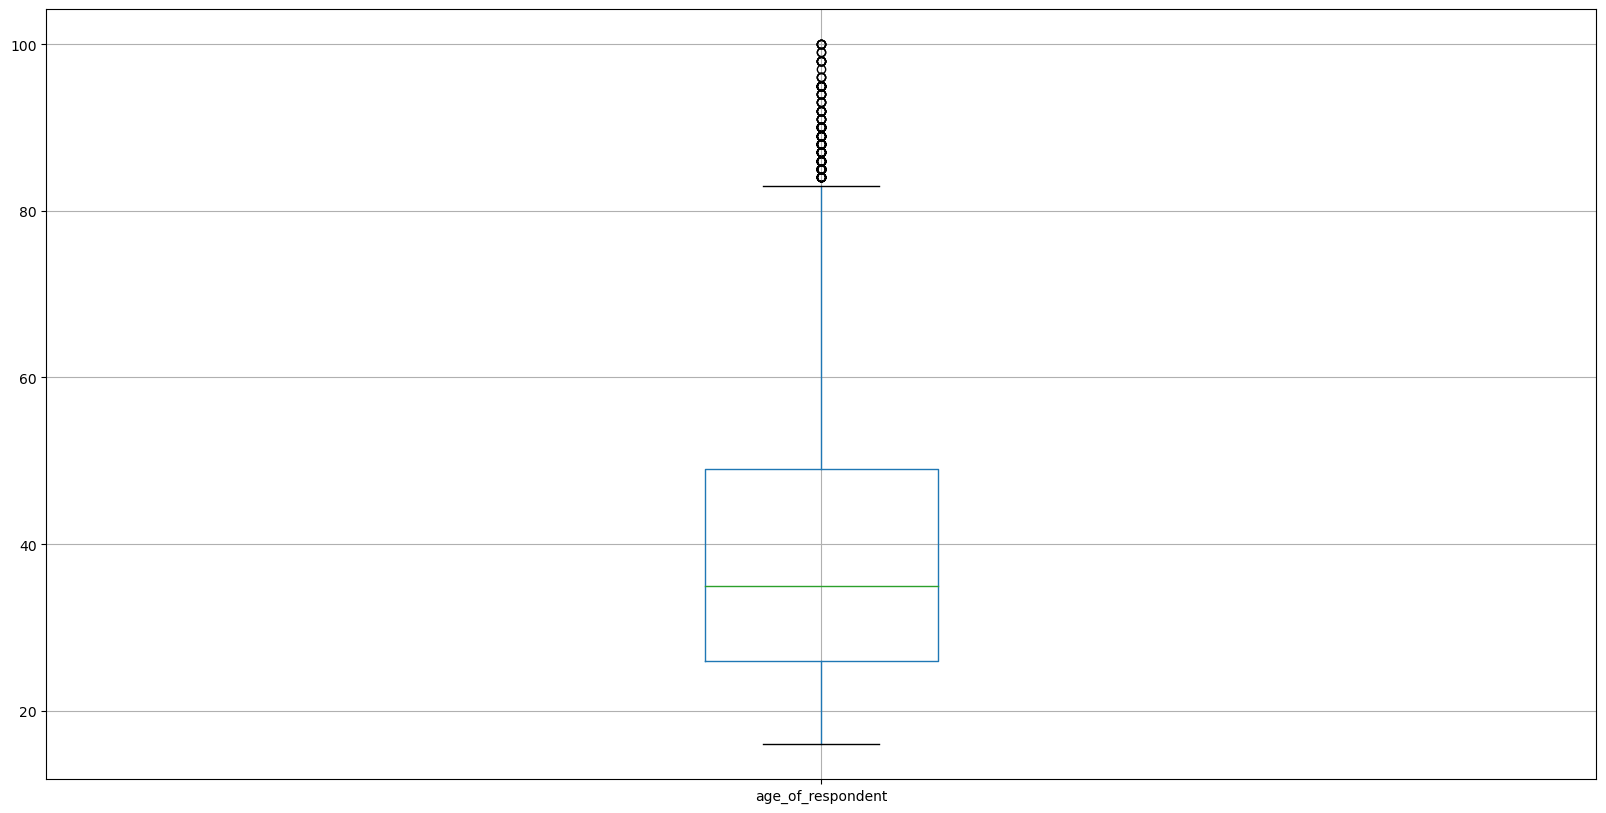

In [6]:
train.boxplot(column='age_of_respondent', figsize=(20,10))

In [7]:
# Distribution of Education level in the dataset
train['education_level'].value_counts()

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

<AxesSubplot:title={'center':'Education Level Distribution'}>

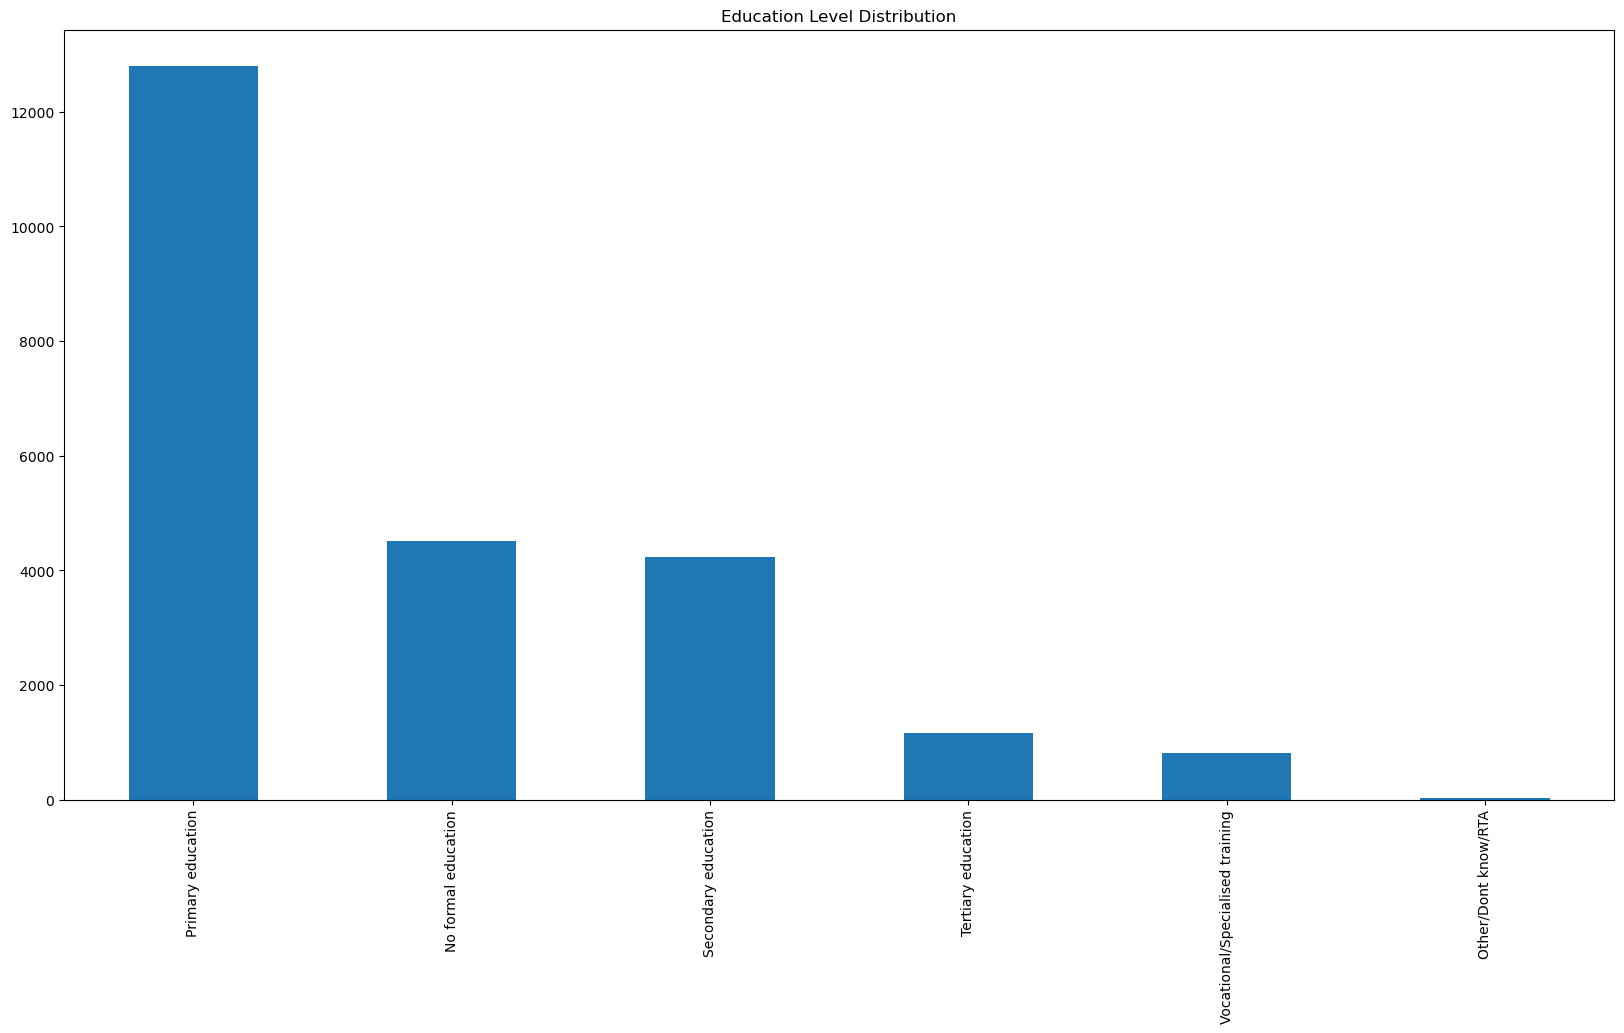

In [8]:
train['education_level'].value_counts().plot(kind='bar', figsize=(20,10), title='Education Level Distribution')

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

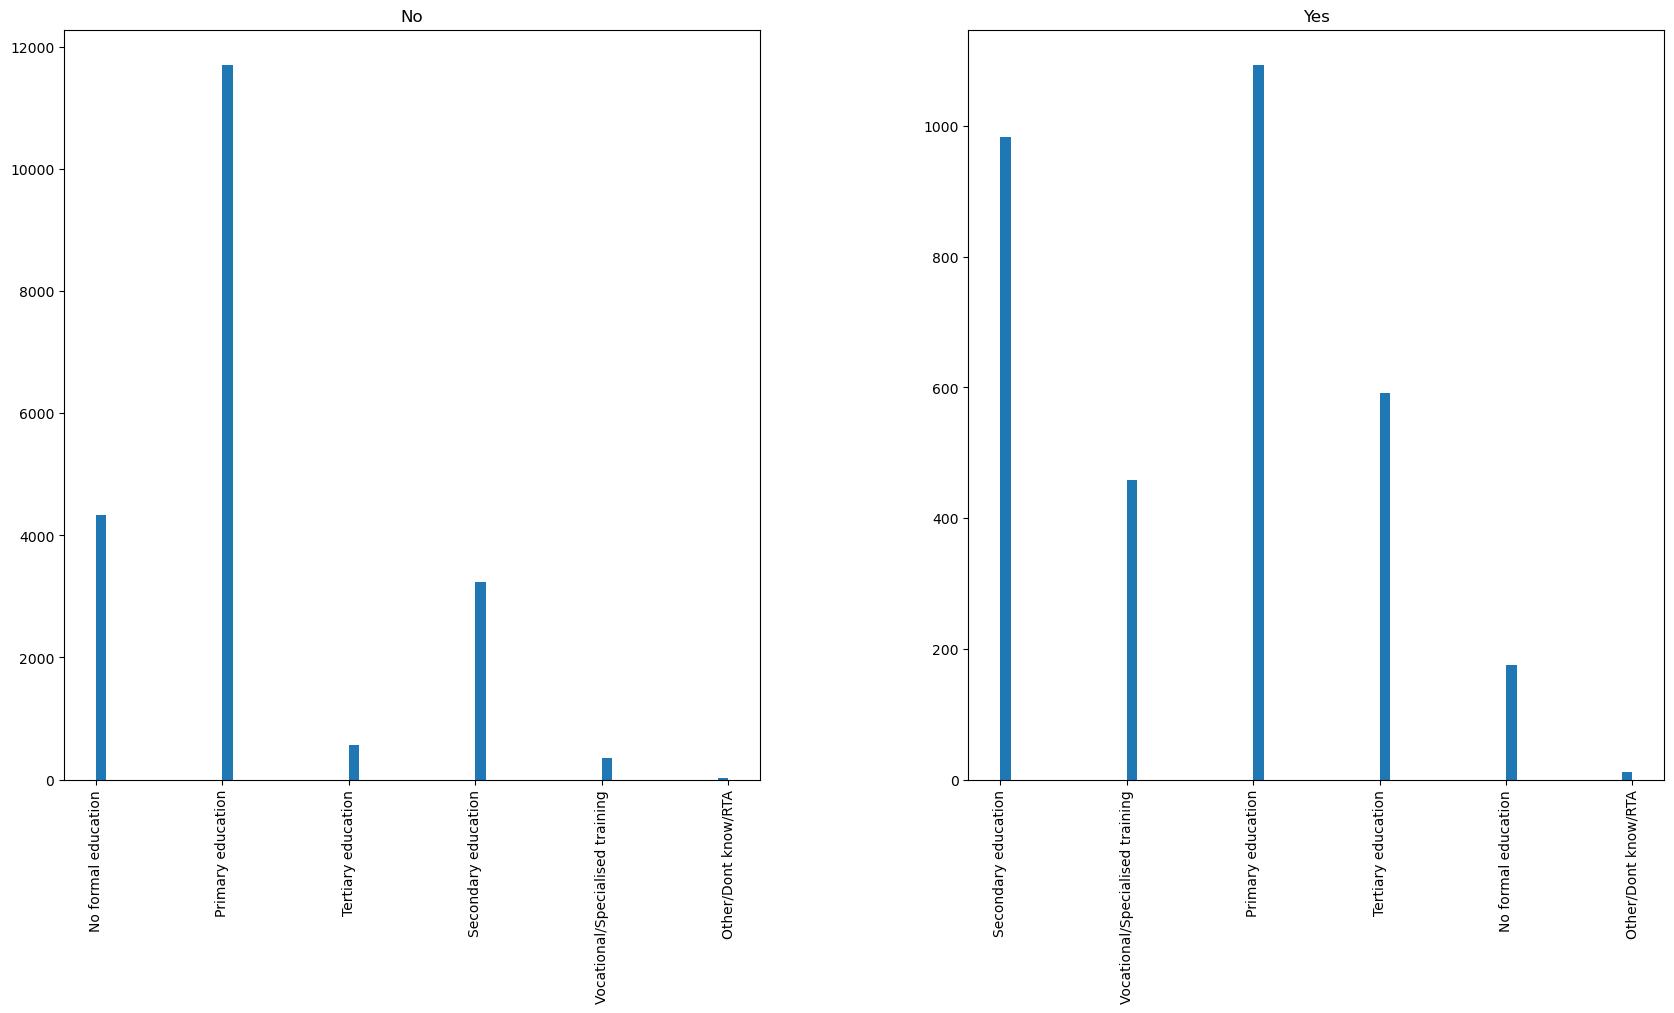

In [9]:
# Influence of Education level on bank account ownership
train.hist(column='education_level', by='bank_account', bins=60, figsize=(20,10))

In [10]:
# Distribution of Job Type in the dataset
train['job_type'].value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

<AxesSubplot:title={'center':'job_type'}>

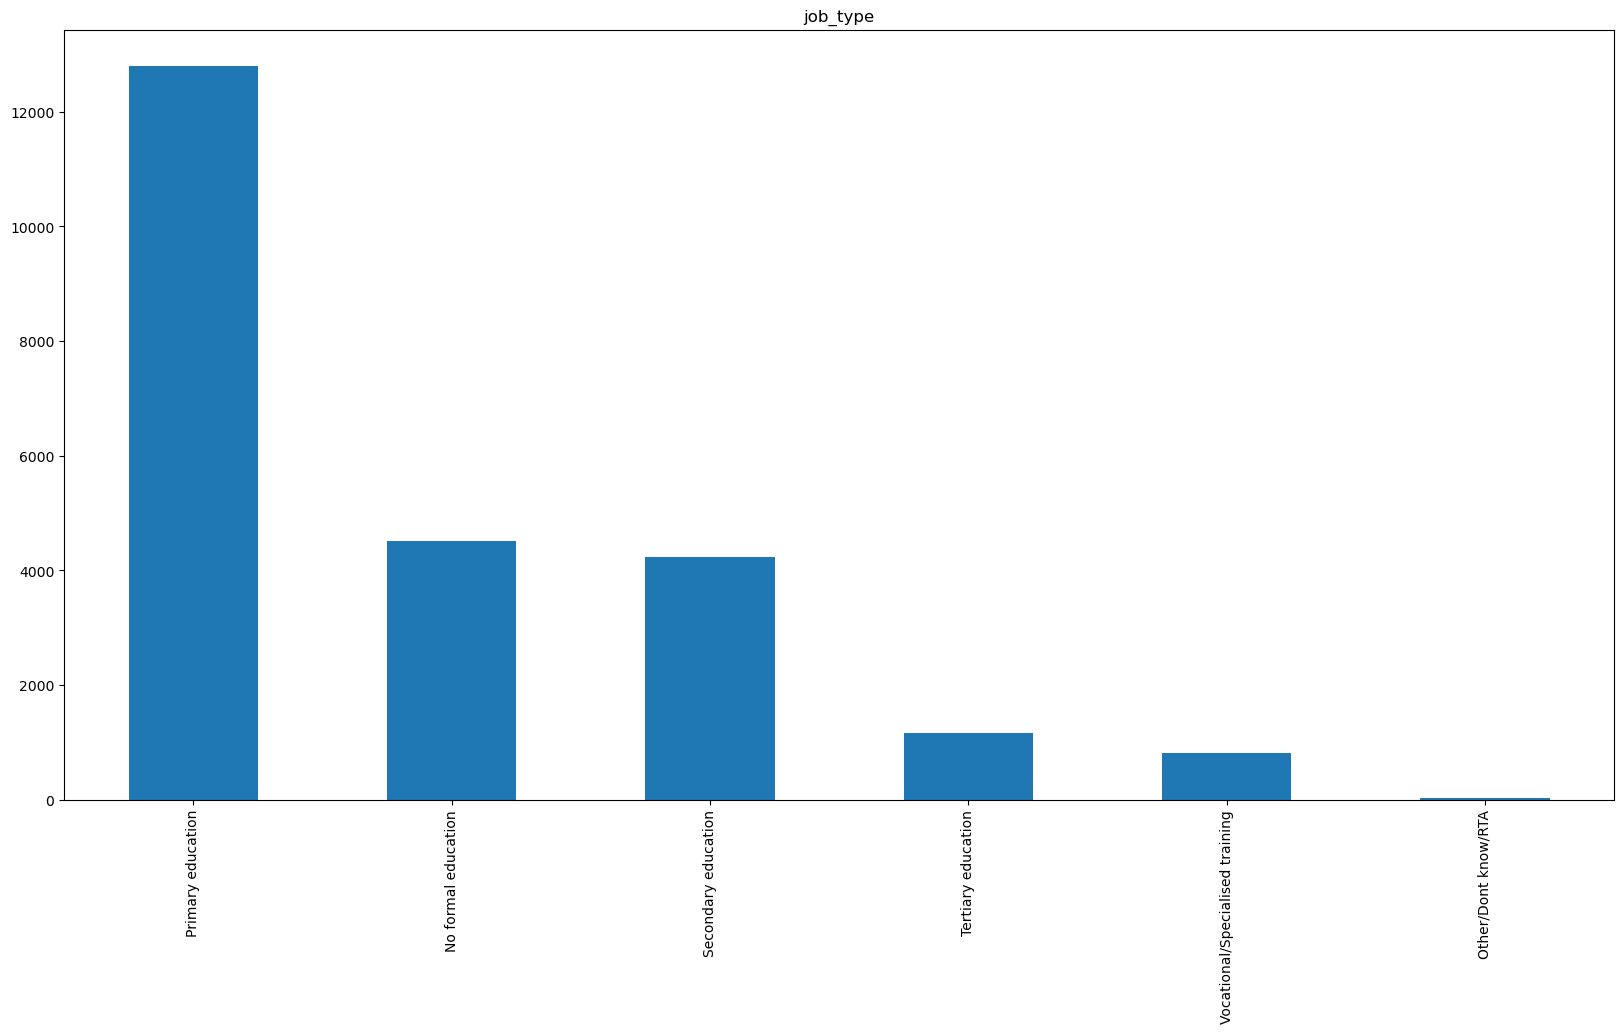

In [11]:
train['education_level'].value_counts().plot(kind='bar', figsize=(20,10), title='job_type')

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

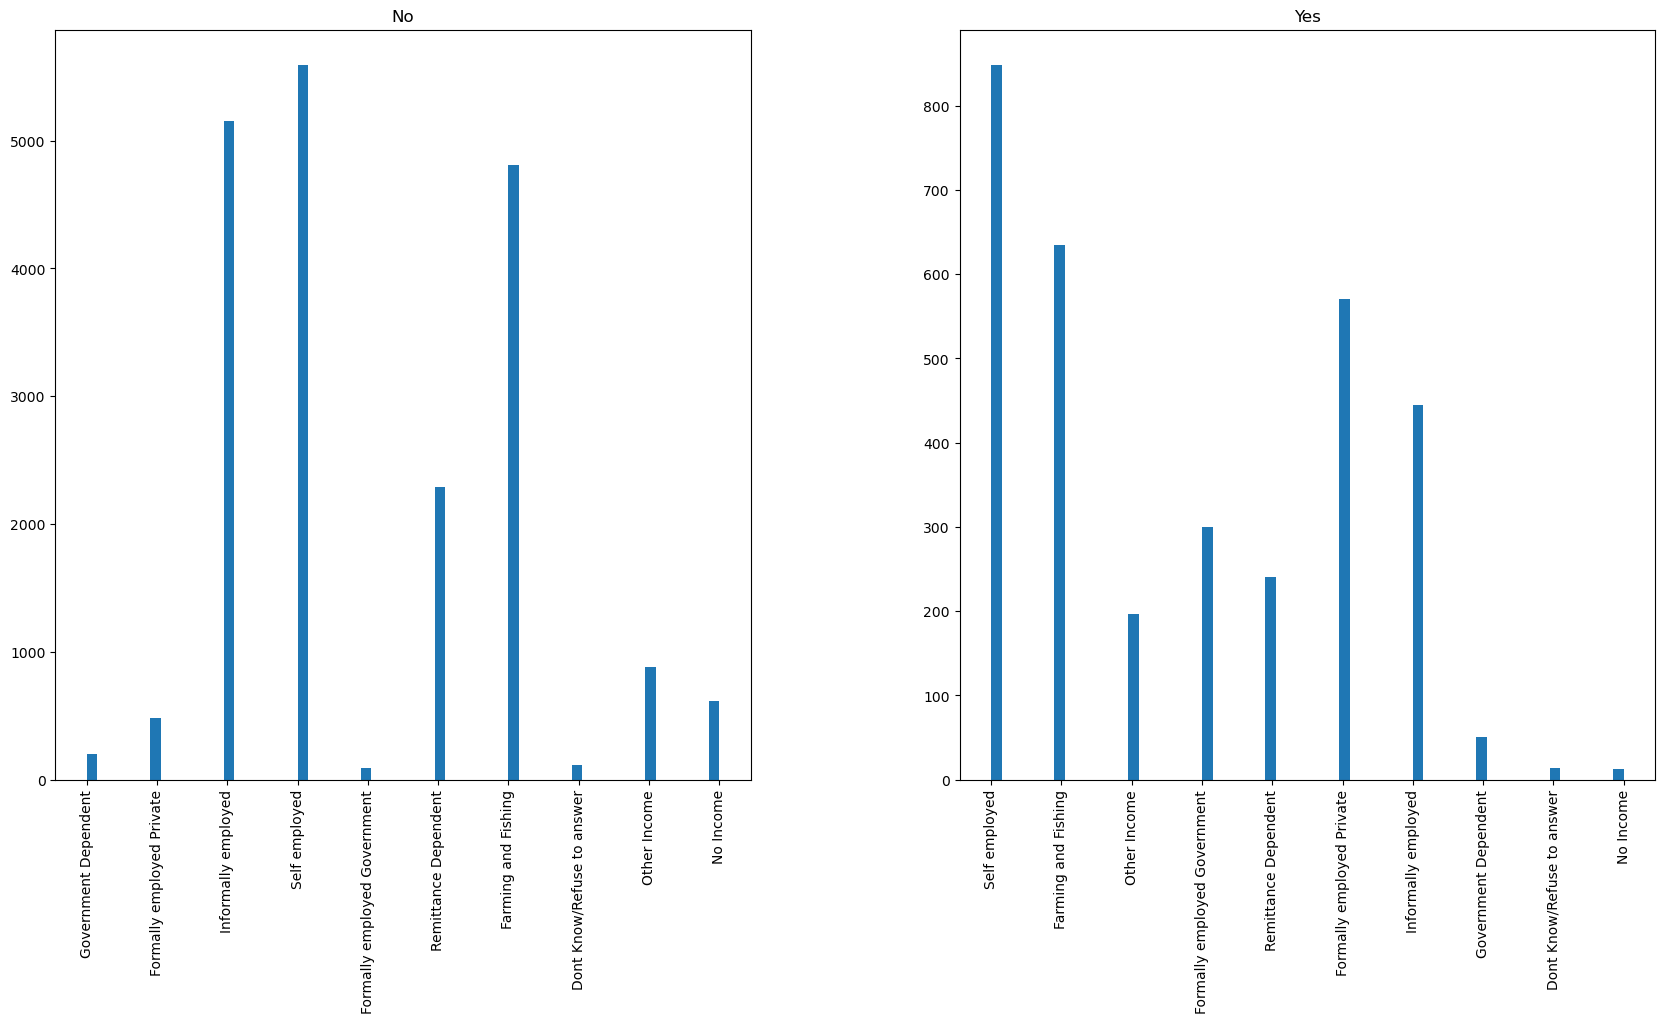

In [12]:
# Influence of Job Type on bank account ownership
train.hist(column='job_type', by='bank_account', bins=60, figsize=(20,10))

### Age

In [13]:
train['age_of_respondent'].mean()

38.80522020064615

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

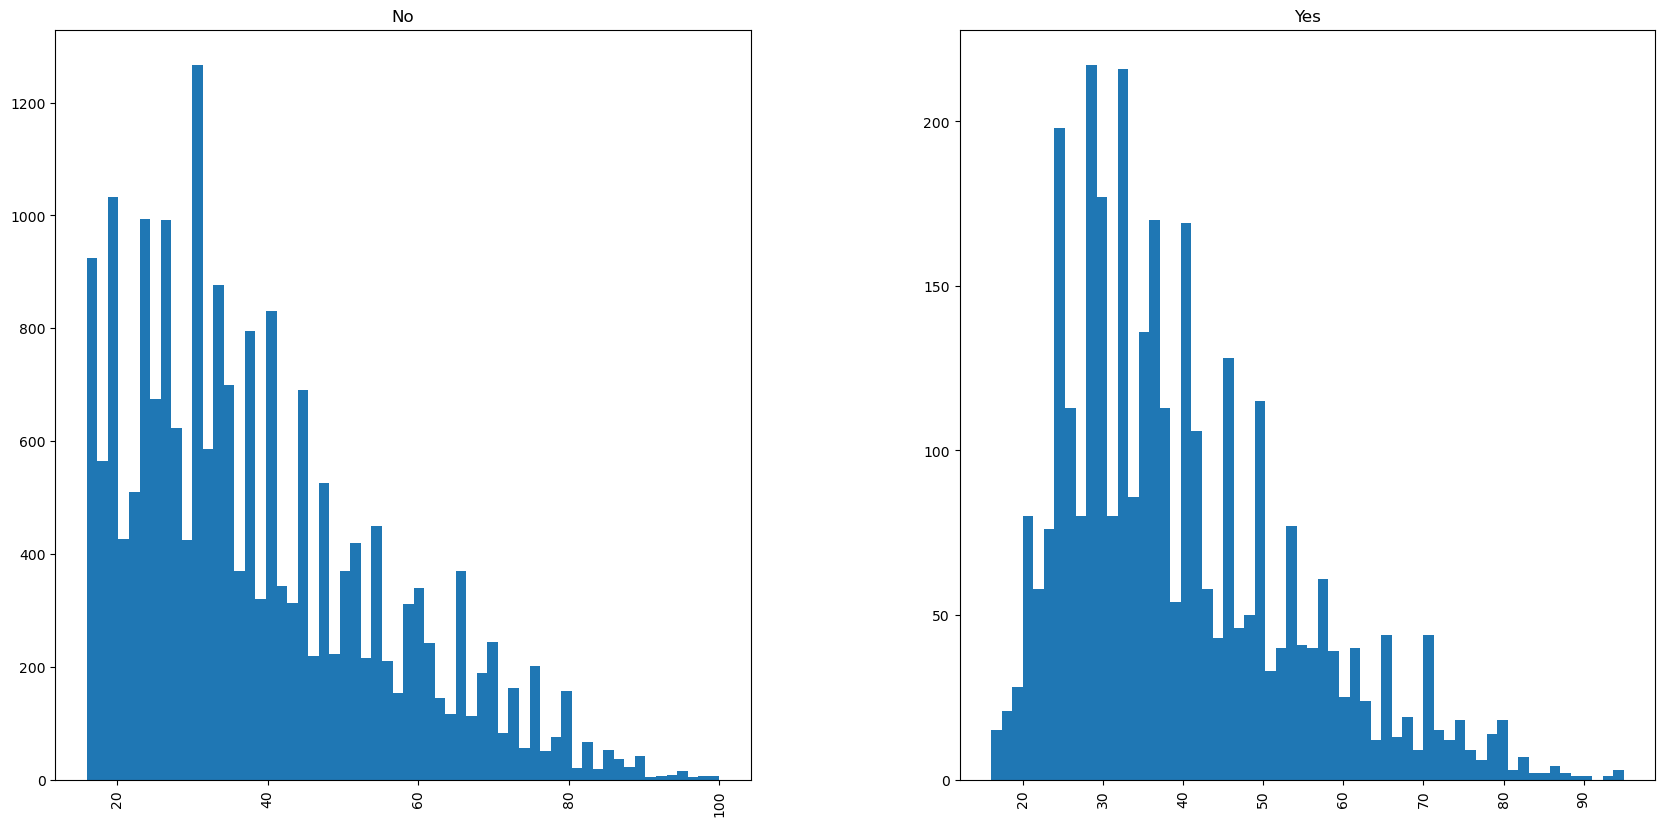

In [14]:
train.hist(column='age_of_respondent', by='bank_account', bins=60, figsize=(20,10))

### Cellphone access

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

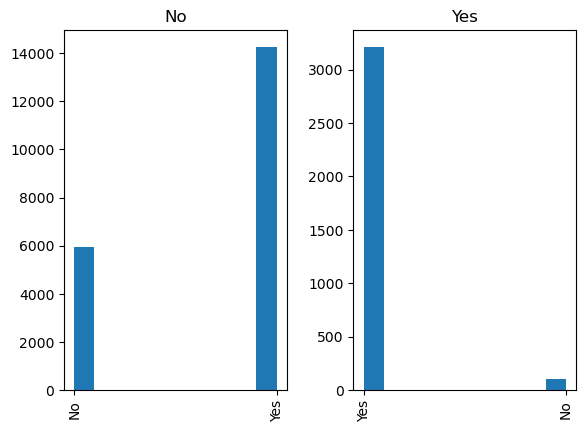

In [15]:
train.hist(column='cellphone_access', by='bank_account')

### Location Type

In [17]:
train['location_type'].value_counts()


Rural    14343
Urban     9181
Name: location_type, dtype: int64

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

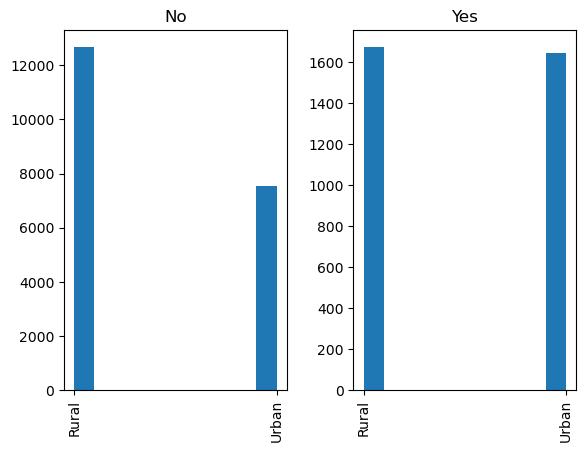

In [18]:
train.hist(column='location_type', by='bank_account')

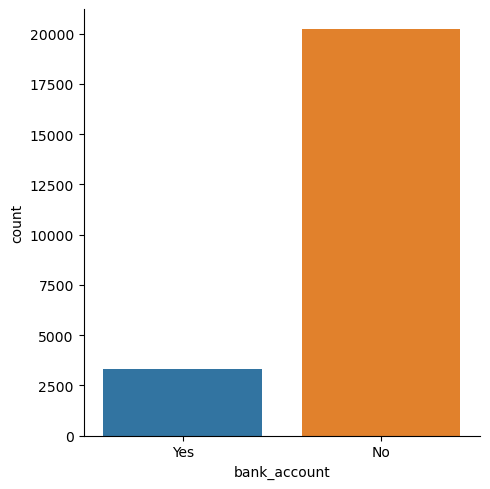

In [19]:
sns.catplot(x="bank_account", kind="count", data=train)